In [1]:
# Import our dependencies

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import scipy.stats as st

# Creating Initial Dataframe

In [2]:
# Import our csv file

file = "mba_decision_dataset.csv"
decision_df = pd.read_csv(file)
decision_df.head()

,Person ID,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,1,27,Male,Arts,3.18,8,Entrepreneur,90624,No,688,185,7.9,7.6,Loan,Finance Manager,156165,International,Entrepreneurship,On-Campus,Yes
1,2,24,Male,Arts,3.03,4,Analyst,53576,Yes,791,405,3.8,4.1,Loan,Startup Founder,165612,International,Career Growth,Online,No
2,3,33,Female,Business,3.66,9,Engineer,79796,No,430,107,6.7,5.5,Scholarship,Consultant,122248,Domestic,Skill Enhancement,Online,No
3,4,31,Male,Engineering,2.46,1,Manager,105956,No,356,257,1.0,5.3,Loan,Consultant,123797,International,Entrepreneurship,On-Campus,No
4,5,28,Female,Business,2.75,9,Entrepreneur,96132,No,472,338,9.5,4.9,Loan,Consultant,197509,Domestic,Skill Enhancement,Online,Yes


In [3]:
# Convert "Yes" to 1 and "No" to 0

decision_df['Has Management Experience'] = decision_df['Has Management Experience'].replace({'Yes': 1, 'No': 0})
decision_df['Decided to Pursue MBA?'] = decision_df['Decided to Pursue MBA?'].replace({'Yes': 1, 'No': 0})

In [4]:
# Remove the "Person ID" column

decision_df.drop(columns=['Person ID'], inplace = True)
decision_df

,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,27,Male,Arts,3.18,8,Entrepreneur,90624,0,688,185,7.9,7.6,Loan,Finance Manager,156165,International,Entrepreneurship,On-Campus,1
1,24,Male,Arts,3.03,4,Analyst,53576,1,791,405,3.8,4.1,Loan,Startup Founder,165612,International,Career Growth,Online,0
2,33,Female,Business,3.66,9,Engineer,79796,0,430,107,6.7,5.5,Scholarship,Consultant,122248,Domestic,Skill Enhancement,Online,0
3,31,Male,Engineering,2.46,1,Manager,105956,0,356,257,1.0,5.3,Loan,Consultant,123797,International,Entrepreneurship,On-Campus,0
4,28,Female,Business,2.75,9,Entrepreneur,96132,0,472,338,9.5,4.9,Loan,Consultant,197509,Domestic,Skill Enhancement,Online,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,33,Female,Economics,3.55,5,Analyst,109172,1,524,100,9.2,8.0,Loan,Startup Founder,69000,International,Networking,Online,1
9996,30,Female,Business,2.48,5,Manager,82515,1,330,362,7.4,8.5,Scholarship,Consultant,131054,Domestic,Entrepreneurship,On-Campus,0
9997,31,Female,Economics,2.86,8,Manager,34152,1,681,308,6.8,8.8,Loan,Consultant,100806,Domestic,Networking,On-Campus,1
9998,22,Female,Arts,2.30,1,Engineer,61897,0,481,190,5.7,7.7,Self-funded,Marketing Director,115872,International,Networking,Online,1


# Creating Employment Dataframes

In [6]:
# Create a Dataframe based solely on employment factors
employment_df = decision_df[["Current Job Title","Years of Work Experience","Annual Salary (Before MBA)","Desired Post-MBA Role", "Expected Post-MBA Salary", "MBA Funding Source","Reason for MBA","Decided to Pursue MBA?"]]
employment_df

,Current Job Title,Years of Work Experience,Annual Salary (Before MBA),Desired Post-MBA Role,Expected Post-MBA Salary,MBA Funding Source,Reason for MBA,Decided to Pursue MBA?
0,Entrepreneur,8,90624,Finance Manager,156165,Loan,Entrepreneurship,1
1,Analyst,4,53576,Startup Founder,165612,Loan,Career Growth,0
2,Engineer,9,79796,Consultant,122248,Scholarship,Skill Enhancement,0
3,Manager,1,105956,Consultant,123797,Loan,Entrepreneurship,0
4,Entrepreneur,9,96132,Consultant,197509,Loan,Skill Enhancement,1
...,...,...,...,...,...,...,...,...
9995,Analyst,5,109172,Startup Founder,69000,Loan,Networking,1
9996,Manager,5,82515,Consultant,131054,Scholarship,Entrepreneurship,0
9997,Manager,8,34152,Consultant,100806,Loan,Networking,1
9998,Engineer,1,61897,Marketing Director,115872,Self-funded,Networking,1


### MBA Pursuers Dataframe

In [14]:
mba_pursuers = employment_df.loc[employment_df["Decided to Pursue MBA?"] == 1]
mba_pursuers

,Current Job Title,Years of Work Experience,Annual Salary (Before MBA),Desired Post-MBA Role,Expected Post-MBA Salary,MBA Funding Source,Reason for MBA,Decided to Pursue MBA?
0,Entrepreneur,8,90624,Finance Manager,156165,Loan,Entrepreneurship,1
4,Entrepreneur,9,96132,Consultant,197509,Loan,Skill Enhancement,1
7,Engineer,6,100072,Finance Manager,199447,Loan,Entrepreneurship,1
8,Entrepreneur,6,118689,Executive,76037,Scholarship,Career Growth,1
9,Entrepreneur,3,112387,Startup Founder,92294,Scholarship,Entrepreneurship,1
...,...,...,...,...,...,...,...,...
9993,Entrepreneur,8,76025,Startup Founder,86385,Employer,Skill Enhancement,1
9994,Entrepreneur,7,92456,Finance Manager,135949,Self-funded,Networking,1
9995,Analyst,5,109172,Startup Founder,69000,Loan,Networking,1
9997,Manager,8,34152,Consultant,100806,Loan,Networking,1


### MBA Non-Pursuers

In [15]:
non_mba_pursuers = employment_df.loc[employment_df["Decided to Pursue MBA?"] == 0]
non_mba_pursuers

,Current Job Title,Years of Work Experience,Annual Salary (Before MBA),Desired Post-MBA Role,Expected Post-MBA Salary,MBA Funding Source,Reason for MBA,Decided to Pursue MBA?
1,Analyst,4,53576,Startup Founder,165612,Loan,Career Growth,0
2,Engineer,9,79796,Consultant,122248,Scholarship,Skill Enhancement,0
3,Manager,1,105956,Consultant,123797,Loan,Entrepreneurship,0
5,Manager,3,101925,Marketing Director,99591,Scholarship,Networking,0
6,Consultant,5,81962,Executive,119223,Self-funded,Networking,0
...,...,...,...,...,...,...,...,...
9988,Entrepreneur,8,38847,Executive,143886,Scholarship,Networking,0
9989,Analyst,0,63162,Executive,166199,Employer,Entrepreneurship,0
9991,Entrepreneur,7,60072,Finance Manager,174191,Self-funded,Entrepreneurship,0
9996,Manager,5,82515,Consultant,131054,Scholarship,Entrepreneurship,0


# Analysis 1 - Job Title vs Pursuing MBA

In [23]:
# Determine how many participants from each job title
job_title_counts = employment_df["Current Job Title"].value_counts()
total_analyst_count = job_title_counts["Analyst"]
total_consultant_count = job_title_counts["Consultant"]
total_engineer_count = job_title_counts["Engineer"]
total_entrep_count = job_title_counts["Entrepreneur"]
total_manager_count = job_title_counts["Manager"]

# Determine how many MBA pursuers from each job title
job_title_pursuers = mba_pursuers["Current Job Title"].value_counts()
analyst_pursuer_count = job_title_pursuers["Analyst"]
consultant_pursuer_count = job_title_pursuers["Consultant"]
engineer_pursuer_count = job_title_pursuers["Engineer"]
entrep_pursuer_count = job_title_pursuers["Entrepreneur"]
manager_pursuer_count = job_title_pursuers["Manager"]

# Determine how many MBA non-pursuers from each job title
job_title_non_pursuers = non_mba_pursuers["Current Job Title"].value_counts()
analyst_non_pursuer_count = job_title_non_pursuers["Analyst"]
consultant_non_pursuer_count = job_title_non_pursuers["Consultant"]
engineer_non_pursuer_count = job_title_non_pursuers["Engineer"]
entrep_non_pursuer_count = job_title_non_pursuers["Entrepreneur"]
manager_non_pursuer_count = job_title_non_pursuers["Manager"]

In [31]:
job_title_df = pd.DataFrame({
    "Pursued": {"Analyst": analyst_pursuer_count, "Consultant": consultant_pursuer_count, "Engineer": engineer_pursuer_count, "Entrepreneur": entrep_pursuer_count, "Manager": manager_pursuer_count},
    "Not Pursued": {"Analyst": analyst_non_pursuer_count, "Consultant": consultant_non_pursuer_count, "Engineer": engineer_non_pursuer_count, "Entrepreneur": entrep_non_pursuer_count, "Manager": manager_non_pursuer_count},
    "Pct Pursued": {"Analyst": analyst_pursuer_count/total_analyst_count, 
                    "Consultant": consultant_pursuer_count/total_consultant_count, 
                    "Engineer": engineer_pursuer_count/total_engineer_count, 
                    "Entrepreneur": entrep_pursuer_count/total_entrep_count, 
                    "Manager": manager_pursuer_count/total_manager_count}
})
job_title_df

,Pursued,Not Pursued,Pct Pursued
Analyst,1154,852,0.575274
Consultant,1191,798,0.598793
Engineer,1196,807,0.597104
Entrepreneur,1214,820,0.596853
Manager,1152,816,0.585366


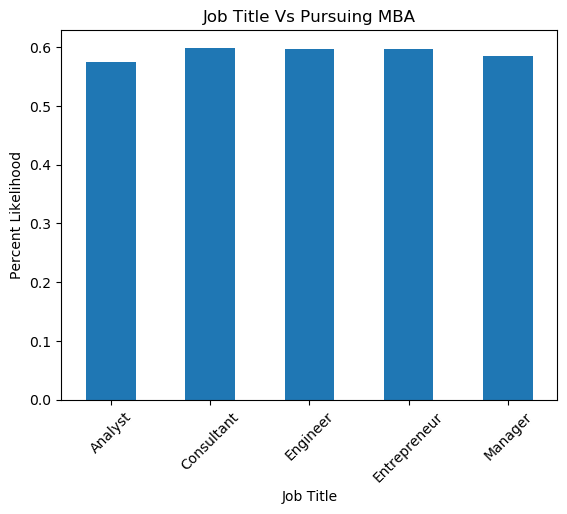

In [41]:
labels = ["Analyst", "Consultant", "Engineer", "Entrepreneur", "Manager"]

job_title_df["Pct Pursued"].plot(kind = "bar", stacked = False, title = "Job Title Vs Pursuing MBA")
plt.xticks(rotation=45)

plt.xlabel("Job Title")
plt.ylabel("Percent Likelihood")

plt.show()

**Report 1**
<br />
In our Analysis of the affect Job Title has on the liklihood of pursuing an MBA, the percentage values were as follows: <br />
<br />
Analysts: 58% <br />
Consultants: 60% <br />
Engineers: 60% <br />
Entrepreneurs: 60% <br />
Managers: 59% <br />
<br />
This analysis showed that Job Title was not a deciding factor since all titles were almost equally likely to pursue an MBA.
<br />
This test was inconclusive.

# Analysis 2 - Post MBA Role vs Pursuing MBA

In [52]:
# Determine how many participants from each post-mba role
post_mba_role_counts = employment_df["Desired Post-MBA Role"].value_counts()
total_consultantR_count = post_mba_role_counts["Consultant"]
total_executive_count = post_mba_role_counts["Executive"]
total_finance_manager_count = post_mba_role_counts["Finance Manager"]
total_marketing_director_count = post_mba_role_counts["Marketing Director"]
total_startup_founder_count = post_mba_role_counts["Startup Founder"]

# Determine how many MBA pursuers from each post-mba role
post_mba_pursuers = mba_pursuers["Desired Post-MBA Role"].value_counts()
consultantR_pursuer_count = post_mba_pursuers["Consultant"]
executive_pursuer_count = post_mba_pursuers["Executive"]
finance_manager_pursuer_count = post_mba_pursuers["Finance Manager"]
marketing_director_pursuer_count = post_mba_pursuers["Marketing Director"]
startup_founder_pursuer_count = post_mba_pursuers["Startup Founder"]

# Determine how many MBA non-pursuers from each post-mba role
post_mba_non_pursuers = non_mba_pursuers["Desired Post-MBA Role"].value_counts()
consultantR_non_pursuer_count = post_mba_non_pursuers["Consultant"]
executive_non_pursuer_count = post_mba_non_pursuers["Executive"]
finance_manager_non_pursuer_count = post_mba_non_pursuers["Finance Manager"]
marketing_director_non_pursuer_count = post_mba_non_pursuers["Marketing Director"]
startup_founder_non_pursuer_count = post_mba_non_pursuers["Startup Founder"]

post_mba_role_counts

Executive             2041
Marketing Director    2027
Consultant            1986
Startup Founder       1978
Finance Manager       1968
Name: Desired Post-MBA Role, dtype: int64

In [50]:
post_mba_role_df = pd.DataFrame({
    "Pursued": {"Consultant": consultantR_pursuer_count, "Executive": executive_pursuer_count, "Finance Manager": finance_manager_pursuer_count, "Marketing Director": marketing_director_pursuer_count, "Startup Founder": startup_founder_pursuer_count},
    "Not Pursued": {"Consultant": consultantR_non_pursuer_count, "Executive": executive_non_pursuer_count, "Finance Manager": finance_manager_non_pursuer_count, "Marketing Director": marketing_director_non_pursuer_count, "Startup Founder": startup_founder_non_pursuer_count},
    "Pct Pursued": {"Consultant": consultantR_pursuer_count/total_consultantR_count, 
                    "Executive": executive_pursuer_count/total_executive_count, 
                    "Finance Manager": finance_manager_pursuer_count/total_finance_manager_count, 
                    "Marketing Director": marketing_director_pursuer_count/total_marketing_director_count, 
                    "Startup Founder": startup_founder_pursuer_count/total_startup_founder_count}
})
post_mba_role_df

,Pursued,Not Pursued,Pct Pursued
Consultant,1194,792,0.601208
Executive,1199,842,0.587457
Finance Manager,1155,813,0.586890
Marketing Director,1191,836,0.587568
Startup Founder,1168,810,0.590495


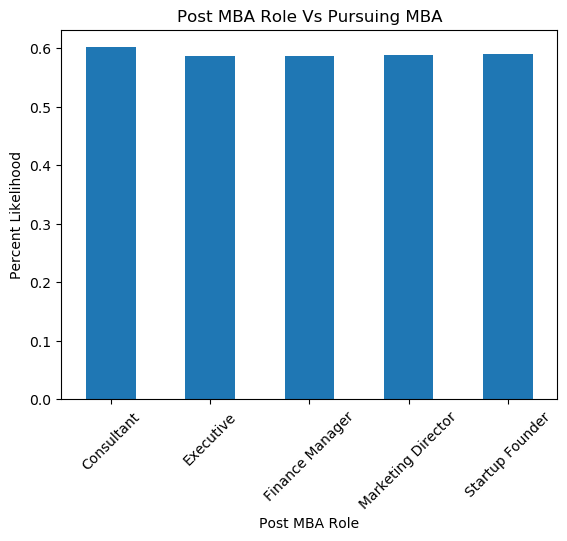

In [51]:
labels = ["Consultant", "Executive", "Finance Manager", "Marketing Director", "Startup Founder"]

post_mba_role_df["Pct Pursued"].plot(kind = "bar", stacked = False, title = "Post MBA Role Vs Pursuing MBA")
plt.xticks(rotation=45)

plt.xlabel("Post MBA Role")
plt.ylabel("Percent Likelihood")

plt.show()

**Report 2**
<br />
In our Analysis of the affect Post-MBA has on the liklihood of pursuing an MBA, the percentage values were as follows: <br />
<br />
Consultant: 60% <br />
Executive: 59% <br />
Finance Manager: 59% <br />
Marketing Director: 59% <br />
Startup Founder: 59% <br />
<br />
This analysis showed that Post-MBA Role was not a deciding factor since all roles were almost equally likely to pursue an MBA.
<br />
This test was inconclusive.

# Analysis 3 - Salary Increase As A Factor For MBA Pursuers

In [110]:
# Update employment dataframe to show Net Salary Increase Column for all participants
employment_df["Net Salary Increase"] = (employment_df["Expected Post-MBA Salary"] - employment_df["Annual Salary (Before MBA)"])
all_net_salary_increase_df = employment_df[["Annual Salary (Before MBA)", "Desired Post-MBA Role", "Expected Post-MBA Salary", "Net Salary Increase"]]
all_net_salary_increase_df

C:\Users\Harry\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Annual Salary (Before MBA),Desired Post-MBA Role,Expected Post-MBA Salary,Net Salary Increase
0,90624,Finance Manager,156165,65541
1,53576,Startup Founder,165612,112036
2,79796,Consultant,122248,42452
3,105956,Consultant,123797,17841
4,96132,Consultant,197509,101377
...,...,...,...,...
9995,109172,Startup Founder,69000,-40172
9996,82515,Consultant,131054,48539
9997,34152,Consultant,100806,66654
9998,61897,Marketing Director,115872,53975


In [67]:
# Update MBA pursuers dataframe to show Net Salary Increase Column for all pursuers
mba_pursuers["Net Salary Increase"] = (mba_pursuers["Expected Post-MBA Salary"] - mba_pursuers["Annual Salary (Before MBA)"])
mba_pursuers_net_salary_increase_df = mba_pursuers[["Annual Salary (Before MBA)", "Desired Post-MBA Role", "Expected Post-MBA Salary", "Net Salary Increase"]]
mba_pursuers_net_salary_increase_df

C:\Users\Harry\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Annual Salary (Before MBA),Desired Post-MBA Role,Expected Post-MBA Salary,Net Salary Increase
0,90624,Finance Manager,156165,65541
4,96132,Consultant,197509,101377
7,100072,Finance Manager,199447,99375
8,118689,Executive,76037,-42652
9,112387,Startup Founder,92294,-20093
...,...,...,...,...
9993,76025,Startup Founder,86385,10360
9994,92456,Finance Manager,135949,43493
9995,109172,Startup Founder,69000,-40172
9997,34152,Consultant,100806,66654


In [116]:
# Find Mean salary increase for MBA pursuers
mba_pursuers_net_salary_increase_df.groupby("Desired Post-MBA Role")["Net Salary Increase"].mean()

Desired Post-MBA Role
Consultant            54398.361809
Executive             58309.918265
Finance Manager       53032.413853
Marketing Director    54559.693535
Startup Founder       55605.188356
Name: Net Salary Increase, dtype: float64

In [125]:
# Find the number of MBA pursuers who expected a net salary increase after attaining their MBA
mba_pursuers_post_salary_increase = mba_pursuers_net_salary_increase_df.loc[(mba_pursuers_net_salary_increase_df["Net Salary Increase"] >= 0)]
mba_pursuers_post_salary_increase

,Annual Salary (Before MBA),Desired Post-MBA Role,Expected Post-MBA Salary,Net Salary Increase
0,90624,Finance Manager,156165,65541
4,96132,Consultant,197509,101377
7,100072,Finance Manager,199447,99375
14,84941,Marketing Director,190224,105283
15,62979,Marketing Director,173363,110384
...,...,...,...,...
9992,39909,Finance Manager,149757,109848
9993,76025,Startup Founder,86385,10360
9994,92456,Finance Manager,135949,43493
9997,34152,Consultant,100806,66654


In [134]:
# Find how many MBA pursuers expected a net salary increase after attaining their MBA
total_mba_pursuers = mba_pursuers.shape[0]
mba_pursuers_post_salary_increase_count =  mba_pursuers_post_salary_increase.shape[0]
pct_pursuers_post_salary_increase = mba_pursuers_post_salary_increase_count/total_mba_pursuers
pct_pursuers_post_salary_decrease = (1 - pct_pursuers_post_salary_increase)

print(f"Total MBA Pursuers: {total_mba_pursuers}")
print(f"MBA Pursuers expecting a net salary increase: {mba_pursuers_post_salary_increase_count}")
print(f"MBA Pursuers expecting a net salary decrease: {total_mba_pursuers - mba_pursuers_post_salary_increase_count}")

Total MBA Pursuers: 5907
MBA Pursuers expecting a net salary increase: 5045
MBA Pursuers expecting a net salary decrease: 862


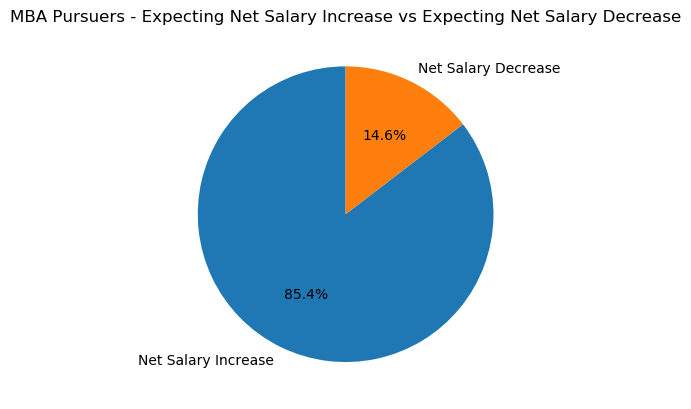

In [133]:
# Create a pie chart illustrating MBA pursuers who expected a net salary increase vs net salary decrease
labels = ["Net Salary Increase", "Net Salary Decrease"]
sizes = [pct_pursuers_post_salary_increase, pct_pursuers_post_salary_decrease]

plt.pie(sizes, labels = labels, autopct = "%1.1f%%", startangle=90)
plt.title("MBA Pursuers - Expecting Net Salary Increase vs Expecting Net Salary Decrease")
plt.show()

**Report 3** <br />
5045 out of 5907 mba pursuers expected to see a net salary increase after pursuing an MBA.<br />
<br />
This shows us that 85.4% of MBA pursuers were likely motivated by earnings potential as a key factor when making their decision.<br />
<br />
14.6% of MBA pursuers did not expect a net salary increase, and were likely motivated to pursue an MBA for other factors relating to career change, or future career success.

# Analysis 4 - Which Reasons Motivated More Participants to Pursue An MBA

# Closing Remarks

**Note** <br />
We determined doing a correlation and linear regression model was not sufficient for this data set because the nature of using a binary measure (pursuing an mba or not pursuing an mba) would not yield readable results to help with our conclusion.